In [130]:
#Importing standard Qiskit libraries
from qiskit import *
from qiskit import QuantumCircuit#Import necessary packages
from qiskit import Aer, execute
from qiskit.visualization import *
import numpy as np
import matplotlib as mpl

In [131]:
#Multiplexer, 8 equations, equation 8 and 5a and 5b. NO THROWAWAY BITS

a = QuantumRegister(15, 'q')
multiplexer = QuantumCircuit(a, name='Multiplexer')

#column 1
#minterms
m1=6
m2=7
m3=8
#controls
c1=3
c2=4
c3=5

#111,110,101,100,011,010,001,000
for x in range(0, 3):
    multiplexer.mct([c1,c2,c3,m3],m1) #Eq 8a
    multiplexer.x(c3)
    multiplexer.mct([c1,c2,c3,m3],m2) #Eq 8b
    multiplexer.x(c2)
    multiplexer.x(c3)
    multiplexer.mct([c1,c2,c3,m1],m2) #Eq 8c
    multiplexer.x(c3)
    multiplexer.mct([c1,c2,c3,m1],m3) #Eq 8d
    multiplexer.x(c1)
    multiplexer.x(c2)
    multiplexer.x(c3)
    multiplexer.mct([c1,c2,c3,m2],m1) #Eq 8e
    multiplexer.x(c3)
    multiplexer.mct([c1,c2,c3,m2],m3) #Eq 8f
    multiplexer.x(c2)
    multiplexer.x(c3)
    multiplexer.mct([c1,c2,c3,m1],m2) #Eq 5a
    multiplexer.mct([c1,c2,c3,m1],m3) #Eq 5a
    multiplexer.x(c3)
    multiplexer.mct([c1,c2,c3,m2],m1) #Eq 5b
    multiplexer.mct([c1,c2,c3,m2],m3) #Eq 5b
    multiplexer.x(c1)
    multiplexer.x(c2)
    multiplexer.x(c3)
    #multiplexer.barrier()
    m1+=3
    m2+=3
    m3+=3

#column 2

m1-=9
m2-=7
m3-=5 

c1-=3
c2-=3
c3-=3

for x in range(0, 3):
    multiplexer.mct([c1,c2,c3,m3],m1) #Eq 8a
    multiplexer.x(c3)
    multiplexer.mct([c1,c2,c3,m3],m2) #Eq 8b
    multiplexer.x(c2)
    multiplexer.x(c3)
    multiplexer.mct([c1,c2,c3,m1],m2) #Eq 8c
    multiplexer.x(c3)
    multiplexer.mct([c1,c2,c3,m1],m3) #Eq 8d
    multiplexer.x(c1)
    multiplexer.x(c2)
    multiplexer.x(c3)
    multiplexer.mct([c1,c2,c3,m2],m1) #Eq 8e
    multiplexer.x(c3)
    multiplexer.mct([c1,c2,c3,m2],m3) #Eq 8f
    multiplexer.x(c2)
    multiplexer.x(c3)
    multiplexer.mct([c1,c2,c3,m1],m2) #Eq 5a
    multiplexer.mct([c1,c2,c3,m1],m3) #Eq 5a
    multiplexer.x(c3)
    multiplexer.mct([c1,c2,c3,m2],m1) #Eq 5b
    multiplexer.mct([c1,c2,c3,m2],m3) #Eq 5b
    multiplexer.x(c1)
    multiplexer.x(c2)
    multiplexer.x(c3)
    #multiplexer.barrier()
    m1+=1
    m2+=1
    m3+=1

multiplexer.to_gate()
#multiplexer.draw('mpl')

In [132]:
#Mirror for multiplexer
mirrormultiplexer = QuantumCircuit(15, name='Mirror Multiplexer')

#minterms
m1=9
m2=12
m3=15

#controls
c1=0
c2=1
c3=2

#column 2
for x in range(0, 3):
    m1-=1
    m2-=1
    m3-=1
    mirrormultiplexer.x(c1)
    mirrormultiplexer.x(c2)
    mirrormultiplexer.x(c3)
    mirrormultiplexer.mct([c1,c2,c3,m2],m3) #Eq 5b
    mirrormultiplexer.mct([c1,c2,c3,m2],m1) #Eq 5b
    mirrormultiplexer.x(c3)
    mirrormultiplexer.mct([c1,c2,c3,m1],m3) #Eq 5a
    mirrormultiplexer.mct([c1,c2,c3,m1],m2) #Eq 5a
    mirrormultiplexer.x(c2)
    mirrormultiplexer.x(c3)
    mirrormultiplexer.mct([c1,c2,c3,m2],m3) #Eq 8f
    mirrormultiplexer.x(c3)
    mirrormultiplexer.mct([c1,c2,c3,m2],m1) #Eq 8e
    mirrormultiplexer.x(c1)
    mirrormultiplexer.x(c2)
    mirrormultiplexer.x(c3)
    mirrormultiplexer.mct([c1,c2,c3,m1],m3) #Eq 8d
    mirrormultiplexer.x(c3)
    mirrormultiplexer.mct([c1,c2,c3,m1],m2) #Eq 8c
    mirrormultiplexer.x(c2)
    mirrormultiplexer.x(c3)
    mirrormultiplexer.mct([c1,c2,c3,m3],m2) #Eq 8b
    mirrormultiplexer.x(c3)
    mirrormultiplexer.mct([c1,c2,c3,m3],m1) #Eq 8a

c1+=3
c2+=3
c3+=3

m1+=9
m2+=7
m3+=5

#column 1
for x in range(0, 3):
    m1-=3
    m2-=3
    m3-=3
    mirrormultiplexer.x(c1)
    mirrormultiplexer.x(c2)
    mirrormultiplexer.x(c3)
    mirrormultiplexer.mct([c1,c2,c3,m2],m3) #Eq 5b
    mirrormultiplexer.mct([c1,c2,c3,m2],m1) #Eq 5b
    mirrormultiplexer.x(c3)
    mirrormultiplexer.mct([c1,c2,c3,m1],m3) #Eq 5a
    mirrormultiplexer.mct([c1,c2,c3,m1],m2) #Eq 5a
    mirrormultiplexer.x(c2)
    mirrormultiplexer.x(c3)
    mirrormultiplexer.mct([c1,c2,c3,m2],m3) #Eq 8f
    mirrormultiplexer.x(c3)
    mirrormultiplexer.mct([c1,c2,c3,m2],m1) #Eq 8e
    mirrormultiplexer.x(c1)
    mirrormultiplexer.x(c2)
    mirrormultiplexer.x(c3)
    mirrormultiplexer.mct([c1,c2,c3,m1],m3) #Eq 8d
    mirrormultiplexer.x(c3)
    mirrormultiplexer.mct([c1,c2,c3,m1],m2) #Eq 8c
    mirrormultiplexer.x(c2)
    mirrormultiplexer.x(c3)
    mirrormultiplexer.mct([c1,c2,c3,m3],m2) #Eq 8b
    mirrormultiplexer.x(c3)
    mirrormultiplexer.mct([c1,c2,c3,m3],m1) #Eq 8a

mirrormultiplexer.to_gate()
#mirrormultiplexer.draw('mpl')

In [143]:
mirrorCounterComparator = QuantumCircuit(19, name='Mirror Cost Counter and Comparator')
#greater than comparator mirror


#counter mirror
'''
i=14
ja=15
jb=16
jc=17
jd=18
'''
i=14
ja=15
jb=16
jc=17
jd=18
for x in range(0, 9):
    mirrorCounterComparator.cx(i,ja)
    mirrorCounterComparator.mct([i,ja],jb)
    mirrorCounterComparator.mct([i,ja,jb],jc)
    mirrorCounterComparator.mct([i,ja,jb,jc],jd)
    i-=1
#counter works--q18 q17 q16 q15-->0001, 0010, 0011, 0100,etc
#counterComparator.measure([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18],[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18])
mirrorCounterComparator.to_gate()
#mirrorCounterComparator.draw('mpl')

In [144]:
diffusion = QuantumCircuit(6, name='Diffusion')
diffusion.h([0,1,2,3,4,5])
diffusion.x([0,1,2,3,4,5])
diffusion.h(5)
diffusion.mct([0,1,2,3,4],5)
diffusion.h(5)
diffusion.x([0,1,2,3,4,5])
diffusion.h([0,1,2,3,4,5])
diffusion.to_gate()
#diffusion.draw('mpl')

In [166]:
#
#Cost counter and comparator, threshold value SAT problem
counterComparator = QuantumCircuit(20, name='Cost Counter and Comparator')
#counterComparator = QuantumCircuit(27, 16)
#counter--count the number of 1s, non zero coefficients q(P)
#"count ones" function
#standard adders to get the final number of 1s
i=6
ja=15
jb=16
jc=17
jd=18
for x in range(0, 9):
    counterComparator.mct([i,ja,jb,jc],jd)
    counterComparator.mct([i,ja,jb],jc)
    counterComparator.mct([i,ja],jb)
    counterComparator.cx(i,ja)
    i+=1
#counter works--q19 q18 q17 q16-->0001, 0010, 0011, 0100,etc
#counterComparator.barrier()

#counterComparator.x(15)
counterComparator.x(16)
counterComparator.x(17)
counterComparator.x(18)
counterComparator.mct([15,16,17,18],19)
counterComparator.x(18)
counterComparator.x(17)
counterComparator.x(16)
#counterComparator.x(15)

counterComparator.to_gate()
#counterComparator.draw('mpl')
#test

In [167]:
qr = QuantumRegister(20, 'q')
cr = ClassicalRegister(6, 'c')
qc = QuantumCircuit(qr, cr)

#m00
#qc.x(6)

#m01
#qc.x(7)

#m02
#qc.x(8)

#m10
#qc.x(9)

#m11
#qc.x(10)

#m12
#qc.x(11)

#m20
qc.x(12)

#m21
#qc.x(13)

#m22
#qc.x(14)

#minterms

qc.x(19)
qc.h([0,1,2,3,4,5,19])
for x in range(0, 20):
    qc.append(multiplexer,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14])
    qc.append(counterComparator,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19])
    qc.append(mirrorCounterComparator,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18])
    qc.append(mirrormultiplexer,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14])
    qc.append(diffusion,[0,1,2,3,4,5])
qc.measure([0,1,2,3,4,5],[0,1,2,3,4,5])
#qc.draw('mpl')

In [168]:
backend_sim = Aer.get_backend('qasm_simulator')
sim = execute(qc, backend_sim, shots=1000)
sim_result = sim.result()
counts = sim_result.get_counts(qc)
from qiskit.visualization import plot_histogram #histogram
#print(counts)

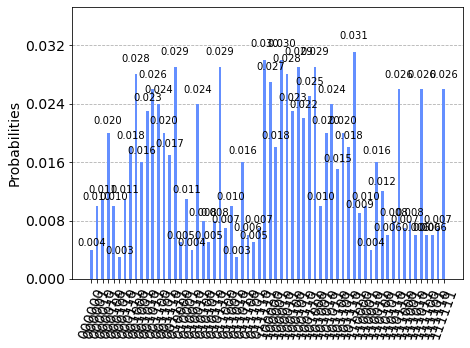

In [169]:
plot_histogram(counts)

In [170]:
max_key = max(counts, key=counts.get)
print(max_key)


101111


In [171]:
qr = QuantumRegister(15, 'q')
cr = ClassicalRegister(15, 'c')
oracle = QuantumCircuit(qr, cr)

#polarity

oracle.x([0,1,2,3,5])

#m00
#oracle.x(6)

#m01
#oracle.x(7)

#m02
#oracle.x(8)

#m10
#oracle.x(9)

#m11
#oracle.x(10)

#m12
#oracle.x(11)

#m20
oracle.x(12)

#m21
#oracle.x(13)

#m22
#oracle.x(14)

#column 1
#minterms
m1=6
m2=7
m3=8
#controls
c1=3
c2=4
c3=5
#111,110,101,100,011,010,001,000
for x in range(0, 3):
    oracle.mct([c1,c2,c3,m3],m1) #Eq 8a
    oracle.x(c3)
    oracle.mct([c1,c2,c3,m3],m2) #Eq 8b
    oracle.x(c2)
    oracle.x(c3)
    oracle.mct([c1,c2,c3,m1],m2) #Eq 8c
    oracle.x(c3)
    oracle.mct([c1,c2,c3,m1],m3) #Eq 8d
    oracle.x(c1)
    oracle.x(c2)
    oracle.x(c3)
    oracle.mct([c1,c2,c3,m2],m1) #Eq 8e
    oracle.x(c3)
    oracle.mct([c1,c2,c3,m2],m3) #Eq 8f
    oracle.x(c2)
    oracle.x(c3)
    oracle.mct([c1,c2,c3,m1],m2) #Eq 5a
    oracle.mct([c1,c2,c3,m1],m3) #Eq 5a
    oracle.x(c3)
    oracle.mct([c1,c2,c3,m2],m1) #Eq 5b
    oracle.mct([c1,c2,c3,m2],m3) #Eq 5b
    oracle.x(c1)
    oracle.x(c2)
    oracle.x(c3)
    m1+=3
    m2+=3
    m3+=3

#column 2

m1-=9
m2-=7
m3-=5 

c1-=3
c2-=3
c3-=3

for x in range(0, 3):
    oracle.mct([c1,c2,c3,m3],m1) #Eq 8a
    oracle.x(c3)
    oracle.mct([c1,c2,c3,m3],m2) #Eq 8b
    oracle.x(c2)
    oracle.x(c3)
    oracle.mct([c1,c2,c3,m1],m2) #Eq 8c
    oracle.x(c3)
    oracle.mct([c1,c2,c3,m1],m3) #Eq 8d
    oracle.x(c1)
    oracle.x(c2)
    oracle.x(c3)
    oracle.mct([c1,c2,c3,m2],m1) #Eq 8e
    oracle.x(c3)
    oracle.mct([c1,c2,c3,m2],m3) #Eq 8f
    oracle.x(c2)
    oracle.x(c3)
    oracle.mct([c1,c2,c3,m1],m2) #Eq 5a
    oracle.mct([c1,c2,c3,m1],m3) #Eq 5a
    oracle.x(c3)
    oracle.mct([c1,c2,c3,m2],m1) #Eq 5b
    oracle.mct([c1,c2,c3,m2],m3) #Eq 5b
    oracle.x(c1)
    oracle.x(c2)
    oracle.x(c3)
    m1+=1
    m2+=1
    m3+=1
oracle.measure([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14],[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14])
#oracle.draw('mpl')

In [172]:
backend_sim = Aer.get_backend('qasm_simulator')
sim = execute(oracle, backend_sim, shots=1000)
sim_result = sim.result()
counts = sim_result.get_counts(oracle)
from qiskit.visualization import plot_histogram #histogram
print(counts)

{'011000011101111': 1000}


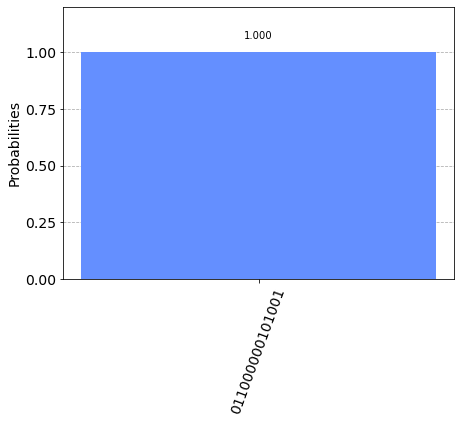

In [127]:
plot_histogram(counts)